# Drill: Kmeans values tweaking - changing k

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", 
                 header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [3]:
def try_kmeans(num):
    
    # Normalize the data.
    X_norm = normalize(X)

    # Reduce it to two components.
    X_pca = PCA(2).fit_transform(X_norm)

    # Calculate predicted values.
    y_pred = KMeans(n_clusters=num, random_state=42).fit_predict(X_pca)

    # Plot the solution.
    plt.figure(figsize=(16, 9))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.show()

    # Check the solution against the data.
    
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, y))
    
    # Each batch will be made up of 200 data points.
    minibatchkmeans = MiniBatchKMeans(init='random', n_clusters=num, batch_size=200)
    minibatchkmeans.fit(X_pca)

    # Add the new predicted cluster memberships to the data frame.
    predict_mini = minibatchkmeans.predict(X_pca)

    # Check the MiniBatch model against our earlier one.
    print('Comparing k-means and mini batch k-means solutions:')
    print(pd.crosstab(predict_mini, y_pred))

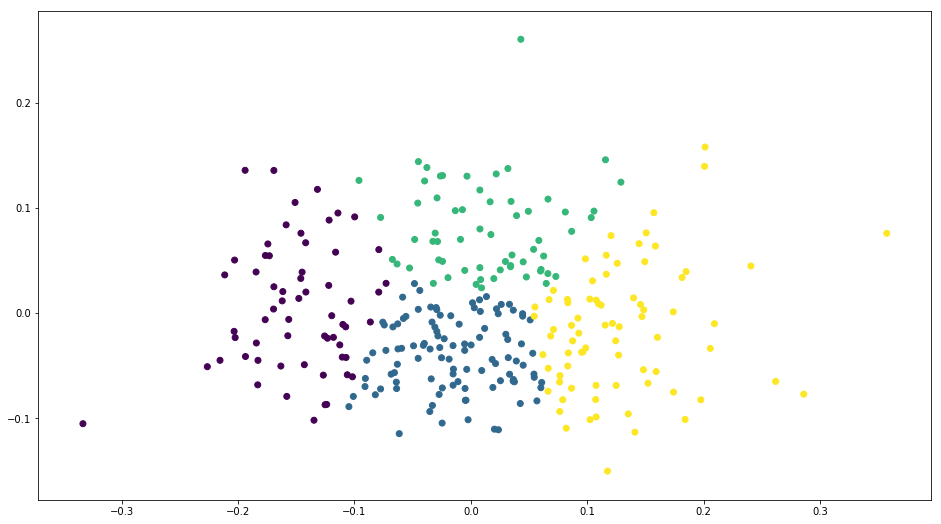

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56
Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3
row_0                
0       0   0  14  43
1       0  58   0  33
2      56  27   0   0
3       5  19  48   0


In [4]:
try_kmeans(4)

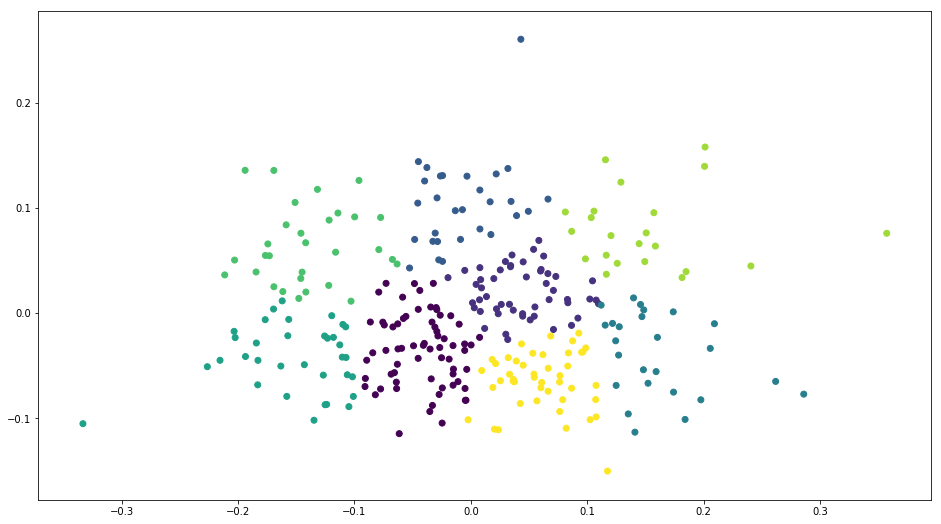

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      32  35
1      22  29
2      17  12
3       5  20
4      19  15
5      24   6
6      12  10
7       8  37
Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4   5   6   7
row_0                                
0      46   1   0   0   0   0   0  11
1       0  11   7   0   0   0  11   0
2      11   0   0   0  32   1   0   0
3       0   0   0  14   0   0   0   6
4       0  23   0   5   0   0   0  28
5       0   0   0   6   0   0  11   0
6      10  16  22   0   0   4   0   0
7       0   0   0   0   2  25   0   0


In [27]:
try_kmeans(8)

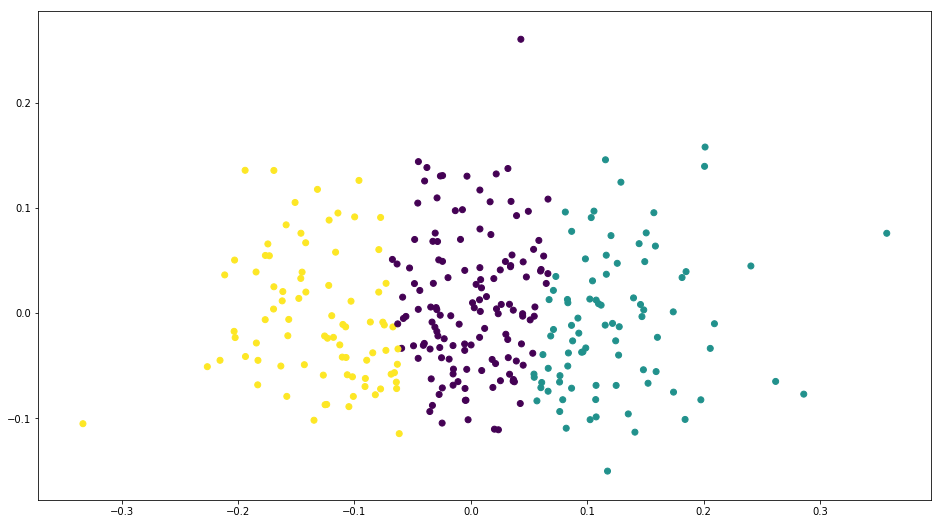

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33
Comparing k-means and mini batch k-means solutions:
col_0   0   1   2
row_0            
0      16   0  80
1      94   7   2
2      25  79   0


In [6]:
try_kmeans(3)

# Interesting mathematics and clusters

### The visualization is neat, but it does not tell us much about the two models' performances compared.

The visualization is nice to help understand what is happening at some level. 

Comparing clusters can be hard to interpret into anything useful, be it against model power or real-world understanding. The classification has two outputs, and when we decompose and use k means with *n > 2* it is difficult to turn into anything but gibberish. 

Basically, we are dividing up a cluster from one model into bins - the bins being where the other model forecasted or grouped the point. Clusters that agree will have spikes at fewer values, and clusters that disagree will have similar numbers split up across a column or row. These mini-batching is actually doing a nice job when compared to the KMeans - and it is doing it in shorter times.